# MÉTODOS PARA PREDIÇÃO DE VENDAS/FATURAMENTO

O presente notebook visa aprensetar todo o raciocínio utilizado para resolução de um problema envolvendo análise preditiva de vendas/faturamento utilizando Python como ferramenta para leitura, análise e elaboração dos métodos estatísticos.

Ressalto que os dados apresentados não são reais por questões de normas internas, mas retraram a mesma distribuição para que o resultado seja o mais próximo do real.



Antes de iniciar o código, baixe e salve o dataset de faturamento em seu drive.



*   [Dataset faturamento](https://drive.google.com/file/d/16nOshO8bVyrOc_EhE9XmzjvnNbBa54Qy/view?usp=sharing)



# Instalações

In [ ]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.5 MB 6.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# Imports

In [ ]:
import numpy as np
import pandas as pd

# Drive

Se estiver utilizando o Google Colab, é necessário fornece-lo acesso ao Drive da conta em que o arquivo .csv está salvo

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Estudo de caso

### Dados para dataframe

Primeiramente, precisamos carregar o arquivo .csv contendo os dados de faturamento para um dataframe utilizando o pandas. 
Como o meu Excel salva .csv separado por ';' então é necessário informar ao pandas.read_csv esta mudança já que, por padrão, o mesmo utiliza apenas vírgula como separador.

Também alterei os nomes das colunas para deixar de uma forma padronizada e para retirar qualquer tipo de acento.

No código abaixo, altere o caminho onde está salvo o arquivo 'faturamento.csv' em seu Drive.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Porto de Areia/faturamento.csv').round(2)
df.columns = ['Ano', 'Mes', 'Faturamento']
df.head()

,Ano,Mes,Faturamento
0,2018,Janeiro,1130384.90
1,2018,Fevereiro,931184.13
2,2018,Marco,1295271.15
3,2018,Abril,1009695.63
4,2018,Maio,953436.86


Trata-se de base de dados simples mas suficiente para que seja possível predizer o faturamento para os primeiros meses de 2021.

Não seria necessário avaliar a qualidade do dataset por eu já ter verificado a veracidade das informações quando o montei, mas deixei um ponto interessante o qual comento mais abaixo.

## Análise do dataset

Em todo trabalho envolvendo dados deve-se criar o costume de observar como os dados se comportam dentro do mesmo afim de tirar alguns inghts prévios ou até mesmo para que tratamos algum problema antes de começar a devida predição assim evitando erros provinientes dos dados e não de nossa lógica.

E com uma simples função é possível verificar a composição do dataset bem como o tipo de dados de cada e se há ou não valores faltantes (null).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ano          36 non-null     int64  
 1   Mes          36 non-null     object 
 2   Faturamento  36 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 992.0+ bytes


São apenas três colunas para este df mas a grande maioria das base de dados contém diversas colunas as quais todas apareceriam com esta função.

Também é interessante notar que não há dados ausentes (null) bem como os tipos de variáveis constantes em cada coluna.

Neste ponto, chamo a atenção pelo tipo Objeto da coluna 'Mes'. Isto pode ou não acarretar em problemas dependendo do objetivo e dos metodos que serão utilizados. Funções de soma e contagem por condições (os clássicos somase e cont.se), agrupamento por variável ou até gráficos, na maioria dos casos, não devem apresentar erros, mas predições utilizando algorítmos estatísticos como KNN, árvores de descisões e as tão faladas Redes Neuráis trabalham com tipos numéricos os quais necessitariam de tratamento.

Antes de tratarmos isto, nesta coluna especificamente espera-se que contenha apenas valores relativos aos meses, mas temos que ter certeza deste detalhe então é necessário lista todos os dados únicos, pois as duplicadas não nos importa nesta etapa.

In [ ]:
df['Mes'].unique()

array(['Janeiro', 'Fevereiro', 'Marco', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

De fato há somente os meses mesmo mas com um detalhe, não há o 'ç' presente em 'Março' o qual foi substituido pelo 'c'.

Como vamos trabalhar com diversos métodos de predição, é necessário substituir o mês pelo número correspodente sendo janeiro o 1, fevereiro 2. Há diversas maneiras de realizar isto então deixei duas para demonstrar as possibilidades.

In [ ]:
#Método manual

df.loc[df['Mes'] == 'Janeiro', 'Mes'] = 1
df.loc[df['Mes'] == 'Fevereiro', 'Mes'] = 2
df.loc[df['Mes'] == 'Marco', 'Mes'] = 3
df.loc[df['Mes'] == 'Abril', 'Mes'] = 4
df.loc[df['Mes'] == 'Maio', 'Mes'] = 5
df.loc[df['Mes'] == 'Junho', 'Mes'] = 6
df.loc[df['Mes'] == 'Julho', 'Mes'] = 7
df.loc[df['Mes'] == 'Agosto', 'Mes'] = 8
df.loc[df['Mes'] == 'Setembro', 'Mes'] = 9
df.loc[df['Mes'] == 'Outubro', 'Mes'] = 10
df.loc[df['Mes'] == 'Novembro', 'Mes'] = 11
df.loc[df['Mes'] == 'Dezembro', 'Mes'] = 12

In [ ]:
#Método prático com FOR

meses = df['Mes'].unique() # lista contendo os meses
i = 1 #variável auxiliar

# itera sobre a lista contendo os meses substituindo um por um pelo número correspondente
for mes in meses:
  df.loc[df['Mes'] == mes, 'Mes'] = i
  i = i + 1

In [ ]:
df.head()

,Ano,Mes,Faturamento
0,2018,1,1130384.90
1,2018,2,931184.13
2,2018,3,1295271.15
3,2018,4,1009695.63
4,2018,5,953436.86


In [ ]:
from google.colab import files

df.to_csv('df.csv', index = False)
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Média aritmética e desvio padrão

Quando seu chefe lhe fizer, de modo simples e direto, alguma pergunta que envolve previsão entenda que ele não espera algo complexo ou que você lhe entregue um relatório detalhado de mais de 30 páginas. Na verdade, ele só quer alguns números pois, na maioria dos casos, ele está com alguma ideia nova e precisa destes dados para ver se vale a pena começar a "estudar" a hipótese de aplicar na prática. 

Esta é uma dica valiosa, toda pergunta, principalmente no ambiente profissional, que não venha acompanhada de um motivo esconde seu objetivo na mente de quem perguntou, ou seja, toda pergunta é feita por que há um bom motivo por trás...






E seguindo esta lógica, como não foi nos falado o motivo do problema que estamos abordando, então espera-se uma resposta simples e direta, mesmo que seja sem muita exatidão.

Por isto, a primeira maneira, e a mais simples de se fazer, é calcularmos a média aritmética da coluna de faturamento, a qual é fácilmente calculado pela função [mean](https://docs.python.org/3/library/statistics.html#statistics.mean) o qual é calculado somando todos os valores presentes na coluna e o dividindo pela quantidade de vezes que eles aparecem.

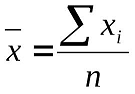






In [ ]:
media = df['Faturamento'].mean()
print('Nos próximos meses será faturado R$', media, '/mês em média')

Nos próximos meses será faturado R$ 1499637.0163888887 /mês em média


Contudo, responder desta maneira seria um tanto grosseiro pela sua simplicidade o qual podemos melhorar mencionando também o desvio padrão da coluna.

In [ ]:
devpad = df['Faturamento'].std()

print('O faturamento para os próximos meses será de R$',media, '/mês em média podendo variar R$', devpad, ' para mais ou para menos.' )

O faturamento para os próximos meses será de R$ 1499637.0163888887 /mês em média podendo variar R$ 310263.6899666654  para mais ou para menos.


O desvio padrão é calculado tirando a raiz da variância calculada.

Ou então apresentar a tabela abaixo:

In [ ]:
colunas = ['Min', 'Média', 'Máx']
min = media - devpad
max = media + devpad
valores = np.array([min, media, max])

df_media = pd.DataFrame([valores] , columns = colunas).round(2)
df_media

,Min,Média,Máx
0,1189373.33,1499637.02,1809900.71


Respondida a pergunta, sim, mas será que tem qualidade? Bem, mesmo tendo a média e o quanto o faturamento pode oscilar no decorrer dos meses ainda sim é preciso ter cuidado pois uma alta variação significa que não há um padrão em nossos dados, ou seja, o faturamento pode oscilar tanto no decorrer dos meses que fica complicado predizer um valor pela simples média.

Seria como se eu te dissese que, em São Paulo, a média de temperatura é 28ºC podendo variar entre 05ºC e 40ºC. Não é uma afirmação errada mas também não nos ajuda em nada já que o range, ou seja, a variação que eu coloquei é tão grande que eu estou pegando quase todos as temperaturas possíveis para São Paulo, ou seja, não falei nada mais do que o óbvio...

Então, para medir o quão homogênio é o nosso faturamento, basta cálcularmos o coeficiênte da variação em porcentagem dividindo a variação pela média.

In [ ]:
coe_var = (devpad / media) * 100

print('O faturamento pode variar em torno de: ', coe_var, '%')

O faturamento pode variar em torno de:  20.6892525708506 %


E para ajudar, pode-se interpretar como:

1.   até 10%:         Ótimo (Pouca Variação)
2.   entre 10% e 20%: Bom
2.   entre 20% e 30%: Regular
2.   entre 30% e 40%: Ruim (Muita variação)



Ou seja, neste período que estamos analisando o faturamento desta empresa oscilou tanto a ponto de que a média histórica pode não condizer com o momento que a empresa pode estar passando agora.

E para termos uma ideia deste momento podemos plotar os dados em um gráfico utilizando a lib MatPlotLib.Pyplot

In [ ]:
import matplotlib.pyplot

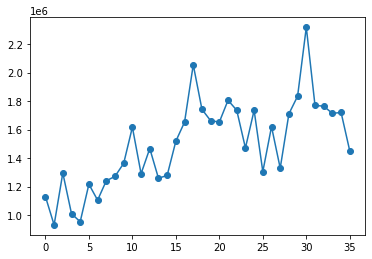

In [ ]:
matplotlib.pyplot.plot(df['Faturamento'], marker='o')

Podemos perceber que a empresa vem crescendo mês a mês a ponto do faturamento dobrar, por isto os cálculos anteriores tiveram aqueles resultados.

Por curiosidade, vamos chamar a função describe() para entender os pontos máximos e mínimos de faturamento.

In [ ]:
df.describe().round(2)

,Ano,Faturamento
count,36.00,36.00
mean,2019.00,1499637.02
std,0.83,310263.69
min,2018.00,931184.13
25%,2018.00,1276674.82
50%,2019.00,1494734.98
75%,2020.00,1723646.06
max,2020.00,2317362.75


Incrível como os valores mínimos e máximos são bem distântes então podemos os considerar como outliers? Talvez o valor máximos, mas ainda sim não é uma discrepância tão grande a ponto de realmente o considerar um outliear mas o valor necessitaria sim de uma análise em seu demonstrativo de resultado e balanço patrimonial pois pode ter sido ocasionado pela venda de um bem como máquinas e equipamentos. Por hora iremos manter pois, na incerteza, mantemos os dados como vieram.

Só por curiosidade:

In [ ]:
dif = ((df['Faturamento'].min() / df['Faturamento'].max()) * 100) +100

print('O faturamento da empresa cresceu ', dif, '% durante o período analisado')

O faturamento da empresa cresceu  140.18292474926508 % durante o período analisado


## Média ponderada

Se para o nosso problema uma simples média não o resolveu então vamos para outro método, a média ponderada, que coloca pesos em cada valor e divide não pela quantidade de itens e sim pela soma dos pesos

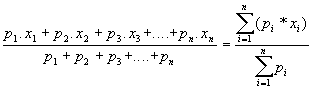

Para o cálculo, utilizaremos os últimos 5 faturamentos sendo dezembro multiplicado pelo pelo 5, novembro por 4, outubro por 3, setembro por 2 e agosto por 1.

A quantidade de valores utilizados não é fixa devendo então ser analisado o problema em questão.

Neste caso, utilizamos os últimos cinco meses apenas pois assim conseguimos trabalhar com o atual momento da empresa e os relatórios dela serem enviados mensalmente.

Caso fosse uma empresa S.A, por exemplo, a qual divulga seus resultados a cada 3 meses, pode-se utilizar os últimos 4 fechando assim o ano vigente ou então 8 já que estas empresas não costumam oscilar tanto em um curto prazo sendo as análises feitas mais a longo prazo.

A função .tail() basicamente funciona da mesma maneira que a .head() só que trazendo os últimos 5 valores. Passamos então esta função para um array e criamos também outro array contendo os pesos de 1 a 5 e por fim a coluna do faturamento multiplicado pelo peso.

In [ ]:
lista = np.transpose((np.array([df['Faturamento'].tail(), np.arange(1,6)])))
pesos = np.arange(1,6)
df_ult = pd.DataFrame(lista, columns = ['Ultimos', 'Pesos'])

df_ult['Ponderado'] = df_ult['Ultimos'] * df_ult['Pesos']

df_ult

,Ultimos,Pesos,Ponderado
0,1769487.98,1.0,1769487.98
1,1763744.73,2.0,3527489.46
2,1713348.85,3.0,5140046.55
3,1719788.46,4.0,6879153.84
4,1449624.63,5.0,7248123.15


In [ ]:
med_pond = df_ult['Ponderado'].sum() / df_ult['Pesos'].sum()

med_pond

1637620.065333333

In [ ]:
df_pond = pd.DataFrame(df['Faturamento'].tail(), columns = ['Faturamento'])
df_pond.index = np.arange(1, len(df_pond) + 1) #reseta o index começando por 1

contador = 0 
while contador <= 2:
  #variáveis auxiliáres
  i = 1
  peso = 0
  soma = 0
  for fat in df_pond['Faturamento'].tail():
    soma = soma + (fat * i)
    peso = peso + i
    i = i + 1

  predicao = soma / peso
  df_pond.loc[df_pond.shape[0]+1] = [predicao] 

  contador = contador + 1

df_pond.tail(2).round(2)

print('A previsão de faturamento para janeiro é de R$', df_pond['Faturamento'][df_pond.shape[0]-2])
print('A previsão de faturamento para fevereiro é de R$', df_pond['Faturamento'][df_pond.shape[0]-1])
print('A previsão de faturamento para março é de R$', df_pond['Faturamento'][df_pond.shape[0]])

A previsão de faturamento para janeiro é de R$ 1637620.065333333
A previsão de faturamento para fevereiro é de R$ 1622427.1104444442
A previsão de faturamento para março é de R$ 1610961.0315703703


Encerramos a previsão após calcularmos o valor de março pois, como utilizamos apenas os últimos 5 valores para cada predição inclusive os preditos, o cálculo de abril utilizaria 3 valores preditos dos 5 o que seria um erro já que não podemos utilizar previsões para calcular outras previsões. 

Para o cálculo de abril, haveria 3 valores preditos e apenas 2 reais.

Caso queira, é necessário aumentar a quantidade de valores rais.

Abaixo encontra-se os valores da média aritmética e a ponderada para comparação

In [ ]:
print('Faturamento de janeiro pela média histórica: R$', media)
print('Faturamento de janeiro pela média ponderada: R$', df_pond['Faturamento'][df_pond.shape[0]-2])

Faturamento de janeiro pela média histórica: R$ 1499637.0163888887
Faturamento de janeiro pela média ponderada: R$ 1637620.065333333


A média ponderada é sutilmente maior do que a média histórica pois nos apresenta um valor mais condizente com o apresentado pela empresa em 2020 já que esta vem, como comentado, em um crescimento constante.

Sendo assim, percebe-se que ponderar o faturamento seria uma alternativa viável para responder a questão do dono da empresa.

A média histórica seria uma excelente medida se estivéssemos verificando, por exemplo, o valor da cotação da ação da AMBEV (ABEV3).




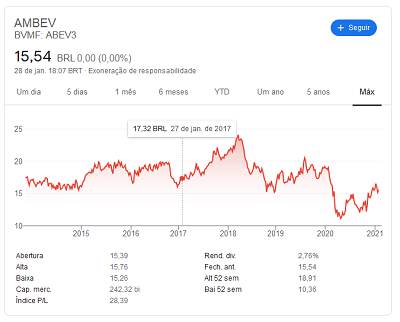

Isto porque há tempos que a cotação da mesma "anda de lado", ou seja, não há um movimento que descreva um crescimento ou decaimento constante que faça necessário um ponderamento.

Claro que para entendermos melhor o que está acontecendo com a AMBEV seria necessário analisar os resultados e indicadores bem como o posicionamento da empresa quanto ao seu futuro já que atualmente ela detém 60% do mercado de cervejas, mas isto é conversa para outro momento.

## Predição por segregação de dados

Ok, poderíamos parar por aqui nossa análise e já comunicar o chefe sobre os resultado, e estaria tudo bem se por tratar-se de uma pergunta simples e direta como comentado anteriormente. Contudo, podemos ir além nos questionando se, mesmo estando em crescimento, será que esta empresa apresenta algum tipo de padrão/ciclo de vendas?

Lojas de roupas, por exemplo, tem um aumento significado de vendas em dezembro por conta das festas, tanto que há uma massiva contratação de colaboradores com contratos temporários neste período afim de atender a alta demanda.



> "No comércio, segundo a Confederação Nacional do Comércio (CNC), neste fim de ano, 70,7 mil trabalhadores temporários deverão ser contratados para atender ao aumento sazonal das vendas. O número é 19,7% menor do que o registrado em 2019 (88 mil). Para o economista Fábio Bentes, autor do relatório, o crescimento do comércio eletrônico reduziu as perdas do varejo na pandemia, mas impõe desafios à expansão das vendas em lojas físicas. O cargo de vendedor deverá responder por 49% das vagas, segundo ele." - Fonte: [Globo Extra](https://extra.globo.com/economia/emprego/comeca-temporada-de-contratacoes-de-fim-de-ano-com-mais-de-78-mil-vagas-abertas-veja-como-aumentar-suas-chances-rv1-1-24708898.html)



Impactado pela COVID-19, sim, mas é inegável a alta geração de empregos no final de ano.

Para termos uma ideia de como funciona as vendas da empresa, podemos plotar os dados em um gráfico de distribuição e analisar mês a mês.

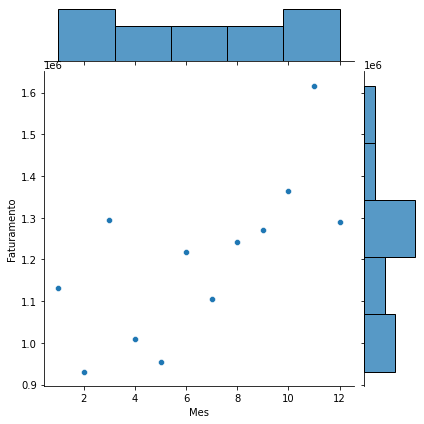

In [ ]:
import seaborn as sns

# Gráfico 2018
df2018 = df.loc[df['Ano'] == 2018]
sns.jointplot(data = df2018, x="Mes", y="Faturamento")

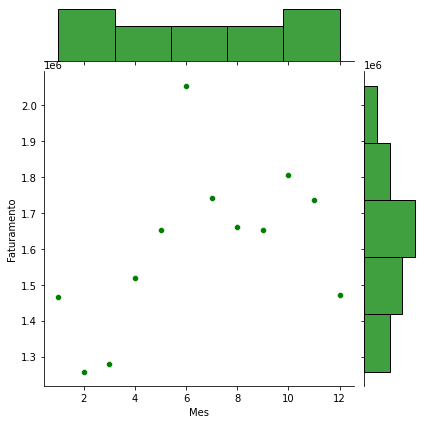

In [ ]:
df2019 = df.loc[df['Ano'] == 2019]
sns.jointplot(data = df2019, x="Mes", y="Faturamento", color = 'green')

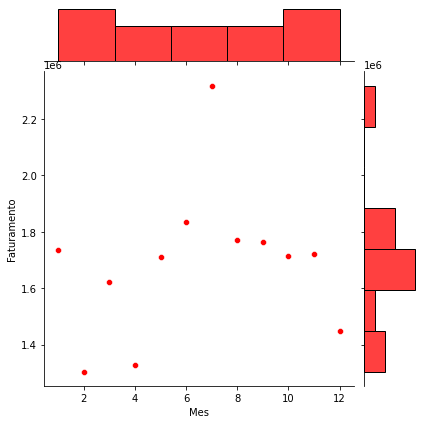

In [ ]:
df2020 = df.loc[df['Ano'] == 2020]
sns.jointplot(data = df2020, x="Mes", y="Faturamento", color = 'red')

Analisando os gráficos, podemos perceber alguns pontos interessantes:



*   As vendas do primeiro semestre são menores do que o do segundo;
*   Fevereiro é o mês que menos vende;
*   O aumento expressivo nas vendas ocorre entre maio e junho;
*   Janeiro tem-se uma tendência de faturar menos do que os últimos meses do ano, com exceção de dezembro.




Os pontos mencionados nos demonstra que a média ponderada dos últimos 5 meses utilizadas para predizer janeiro, fevereiro e março resulte em um valor do que o que deve se concretizar.

Errar uma predição é normal já que trata-se de tentar adivinhar o futuro, mas pensemos como o dono do negócio:



*   Se o faturamento for maior do que o valor predito então isto é um sinal positivo pois, no pior dos casos, sobrou mais dinheiro em caixa já que os gastos planejados seguiram o valor predito;
*   Se o faturamento é menor do que o valor predito então haverá um problema no caixa já que eu posso ter faturado menos do que o necessário para quitar as contas.

Sendo assim, devemos sempre nos aproximar do valor real mas, no caso de faturamento, **se for errar então que erre para menos**.



In [ ]:
df_janeiro = df.loc[df['Mes'] == 1]
print(df_janeiro)
print('--------------------------')
print('A predição de faturamento de janeiro utilizando o histórico deste mês  R$', df_janeiro['Faturamento'].mean())

     Ano Mes  Faturamento
0   2018   1   1130384.90
12  2019   1   1466808.30
24  2020   1   1735218.86
--------------------------
A predição de faturamento de janeiro utilizando o histórico deste mês  R$ 1444137.3533333335


In [ ]:
df_fevereiro = df.loc[df['Mes'] == 2]
print(df_fevereiro)
print('--------------------------')
print('A predição de faturamento de fevereiro utilizando o histórico deste mês de R$', df_fevereiro['Faturamento'].mean())

     Ano Mes  Faturamento
1   2018   2    931184.13
13  2019   2   1258425.67
25  2020   2   1304661.73
--------------------------
A predição de faturamento de fevereiro utilizando o histórico deste mês de R$ 1164757.1766666665


In [ ]:
df_marco = df.loc[df['Mes'] == 3]
print(df_marco)
print('--------------------------')
print('A predição de faturamento de março utilizando o histórico deste mês é de R$', df_marco['Faturamento'].mean())

     Ano Mes  Faturamento
2   2018   3   1295271.15
14  2019   3   1278398.88
26  2020   3   1620383.82
--------------------------
A predição de faturamento de março utilizando o histórico deste mês é de R$ 1398017.95


Calculando a média utilizando apenas o histórico de vendas de cada mês nos retornou valores menores do que a média histórica e a ponderada.

E poderíamos até ponderar estes valores mas, como mencionado acima, 2020 teve um faturamento maior do que os outros anos logo, se utilizarmos os pesos a predição será maior e o resultado pode não nos favorecer caso erremos para baixo.

Arisco até dizer que, neste caso, este método será o que melhor representará o valor real da empresa a ser faturado já que está engloba o crescimento mencionado sem esquecer que a mesma possui um ciclo de faturamento.

## Regressão linear e a equação da reta

Outra técnica que podemos utilizar para predição é a de encontrarmos a **equação da reta por meio de uma regressão linear**.

Quando plotamos os dados em um gráfico de dispersão teremos sua distribuição onde podemos plotar uma reta que melhor represente-os, ou seja, que se ajuste a ponto do erro ser o mínimo possível.

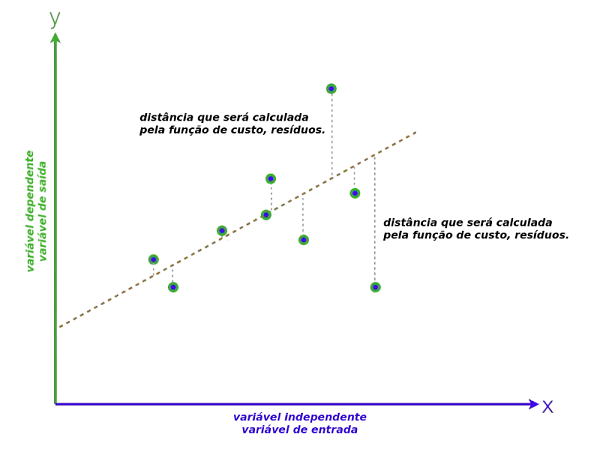

Este ajuste é feito encontrando o erro mínimo entre os pontos e a reta mencionada.

Com poucos dados é possível calcular na mão mesmo mas mesmo o nosso dataset se torna um árduo trabalho o qual podemos deixar para o Python ou mesmo o Excel.

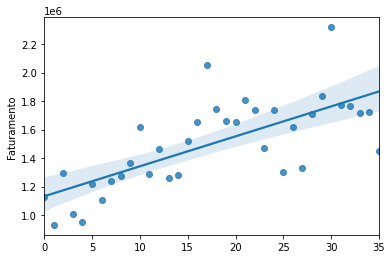

In [ ]:
ax = sns.regplot(x = df.index, y="Faturamento", data=df)

Em seguida precisamos da equação desta reta para que possamos assim calcular os valores da predição.

In [ ]:
coefficients = np.polyfit(df.index, df['Faturamento'], 1)

a = coefficients[0]
b = coefficients[1]

print ('a =', coefficients[0])
print ('b =', coefficients[1])
print('-----------------------')
print('Equação da reta = ', a, '* x + ', b)

a = 21002.607947232962
b = 1132091.3773123121
-----------------------
Equação da reta =  21002.607947232962 * x +  1132091.3773123121


A equação mencionada segue o padrão:

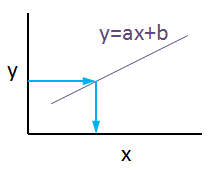

Onde basta substituir os valores das variáveis A e B encontradas pela função polyfit para façamos a predição mencionada.

In [ ]:
jan_reta = a * 36 + b
fev_reta = a * 37 + b
mar_reta = a * 38 + b

print('Predição por Reg.Linear para janeiro: ', jan_reta)
print('Predição por Reg.Linear para fevereiro: ', fev_reta)
print('Predição por Reg.Linear para março: ', mar_reta)

Predição por Reg.Linear para janeiro:  1888185.2634126986
Predição por Reg.Linear para fevereiro:  1909187.8713599318
Predição por Reg.Linear para março:  1930190.4793071647


Como a reta tem tendência de crescimento, é de se esperar que quanto maior distante do marco zero maior o valor . Contudo, não que isto esteja errado pois realmente a empresa vem crescendo ano a ano, mas não faz jus aos meses inicias como comentado.

Mas e se utilizarmos a regressão linear para a segregação de dados agrupando por mês?

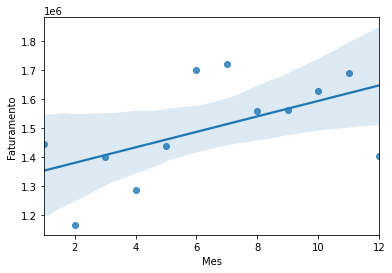

In [ ]:
df_groupy = df.groupby(['Mes']).sum()/3

ax = sns.regplot(x = df_groupy.index, y="Faturamento", data=df_groupy)

In [ ]:
coefficients_gp = np.polyfit(df_groupy.index, df_groupy['Faturamento'], 1)

a_gp = coefficients_gp[0]
b_gp = coefficients_gp[1]

print ('a =', coefficients_gp[0])
print ('b =', coefficients_gp[1])
print('-----------------------')
print('Equação da reta = ', a_gp, '* x + ', b_gp)
print('')
print('')
print('')


print('-----------------------')
jan_reta_gp = a_gp * 13 + b_gp
fev_reta_gp = a_gp * 14 + b_gp
mar_reta_gp = a_gp * 15 + b_gp

print('Predição por Reg.Linear para janeiro: ', jan_reta_gp)
print('Predição por Reg.Linear para fevereiro: ', fev_reta_gp)
print('Predição por Reg.Linear para março: ', mar_reta_gp)

NameError: ignored

Segregando os dados, obtemos uma reta um pouco menos inclinada do que a que utilizamos os dados históricos ficando próximo da média ponderada.

## Séries temporais

Antes de concluirmos, não poderíamos deixar de tentar predizer o faturamento utilizando modelos de predição para Series temporais.

Uma série temporal nada mais é do que uma sequencia de eventos ocasionados ao longo de um determinado espaço/tempo que ocorre geralmente em intervalos uniformes.

O nosso caso se enquadra perfeitamente em uma serie temporal pois o faturamento ocorre a cada mês sucessivamente.

Há vários métodos para predição de uma série temporal onde suas utilizações se baseiam em como os dados são distribuídos.

Em uma série temporal você pode ter valores eventos que ocorrem regularmente o qual dizemos que a série é sazonal podendo também ter tendências como a figura abaixo que representa uma série sazonal com tendência de crescimento.

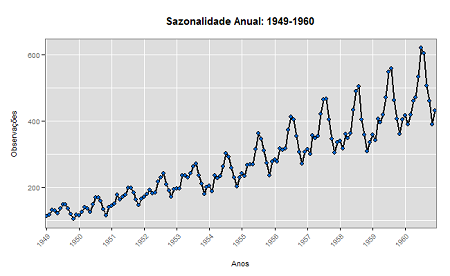

Ou também um conjunto de dados que variam ao redor de uma média constante como é o caso já mencionado da precificação da ação da AMBEV.

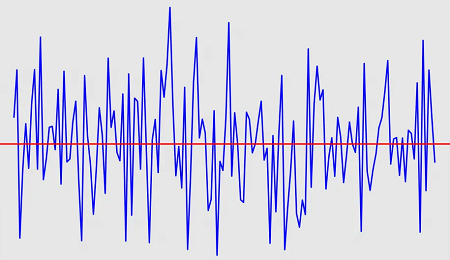

E utilizando a lib statsmodels, o qual instalamos no começo deste notebook, é possível predizermos o faturamento dos próximos meses informando apenas esta coluna.

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Fit model/treinamento do modelo
model = AutoReg(df['Faturamento'], lags=1, old_names=True) #old_names só foi utilizado por conta de um aviso da próxima versão
model_fit = model.fit()

# Predição
yhat = model_fit.predict(len(df['Faturamento']), len(df['Faturamento'])+2)
pred = np.array(yhat)
print('Predição utilizando Série Temporal baseado em AutoRegression (AR)')
print('-----------------------------------------------------------------')
print('Janeiro: R$', pred[0])
print('Fevereiro: R$', pred[1])
print('Março: R$', pred[2])


Predição utilizando Série Temporal baseado em AutoRegression (AR)
-----------------------------------------------------------------
Janeiro: R$ 1477049.8859095967
Fevereiro: R$ 1494716.541591109
Março: R$ 1506096.954010885


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit model/treinamento do modelo
model = ARIMA(df['Faturamento'], order=(1, 1, 1)) #old_names só foi utilizado por conta de um aviso da próxima versão
model_fit = model.fit()

# Predição
yhat = model_fit.predict(len(df['Faturamento']), len(df['Faturamento'])+2, typ='levels')
pred = np.array(yhat)

print('Predição utilizando Série Temporal baseado em Autoregressive Integrated Moving Average (ARIMA)')
print('----------------------------------------------------------------------------------------------')
print('Janeiro: R$', pred[0])
print('Fevereiro: R$', pred[1])
print('Março: R$', pred[2])

Predição utilizando Série Temporal baseado em Autoregressive Integrated Moving Average (ARIMA)
----------------------------------------------------------------------------------------------
Janeiro: R$ 1535951.973508485
Fevereiro: R$ 1478161.9988451726
Março: R$ 1516848.2485993775


Interessante notar que, por mais próximo que os valores preditos sejam, o modelo baseado na Auto Regressão segue o que vimos anteriormente, ou seja, a tendência de crescimento enquanto o ARIMA se ajustou melhor as oscilações vistas no decorrer dos meses bem como se aproxima do que vimos na segregação dos dados.

Por fim, encerro minha análise predizendo o faturamento para o ano, o que é muita coisa exigindo mais detalhes e até uma segregação de dados por semestre, eu sei, mas vale a brincadeira.

In [ ]:
# Fit model/treinamento do modelo
model = ARIMA(df['Faturamento'], order=(1, 1, 1)) #old_names só foi utilizado por conta de um aviso da próxima versão
model_fit = model.fit()

# Predição
yhat = model_fit.predict(len(df['Faturamento']), len(df['Faturamento'])+11, typ='levels')
pred = np.array(yhat)

print('Predição utilizando Série Temporal baseado em Autoregressive Integrated Moving Average (ARIMA)')
print('----------------------------------------------------------------------------------------------')
print('Janeiro:   R$', pred[0])
print('Fevereiro: R$', pred[1])
print('Março:     R$', pred[2])
print('Abril:     R$', pred[3])
print('Maio:      R$', pred[4])
print('Junho:     R$', pred[5])
print('Julho:     R$', pred[6])
print('Agosto:    R$', pred[7])
print('Setembro:  R$', pred[8])
print('Outubro:   R$', pred[9])
print('Novembro:  R$', pred[10])
print('Dezembro:  R$', pred[11])

Predição utilizando Série Temporal baseado em Autoregressive Integrated Moving Average (ARIMA)
----------------------------------------------------------------------------------------------
Janeiro:   R$ 1535951.973508485
Fevereiro: R$ 1478161.9988451726
Março:     R$ 1516848.2485993775
Abril:     R$ 1490950.574672989
Maio:      R$ 1508287.212859911
Junho:     R$ 1496681.575053267
Julho:     R$ 1504450.7184965794
Agosto:    R$ 1499249.8333019535
Setembro:  R$ 1502731.453509515
Outubro:   R$ 1500400.7580959294
Novembro:  R$ 1501960.9917765334
Dezembro:  R$ 1500916.5270541585


E para quem quiser conhecer outros modelos de Séries Temporais basta acessar o site [machinelearningmastery.com](https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/)

# Conclusão

Interessante notarmos como uma simples pergunta que envolve previsão de faturamento, e com uma base de dados literalmente simples, pode apresentar diversos tipos de resultados, alguns próximos e outros não, baseados nos métodos que são utilizados para resolução.

Para nosso caso em específico, a série temporal bem como a segregação de dados tiveram seus resultados mais próximos do padrão observado, sendo assim estas duas métricas são as mais viáveis em termos de acerto bem como risco como resposta a pergunta de nosso chefe. Contudo a certeza de fato só virá quando os resultados de janeiro, por exemplo, fossem confirmados.

Predizer é tentar antecipar o resultado que mais se aproximará do real futuro utilizando da matemática, mas longe de um simples número, esta "arte" só ganha o seu devido valor se for utilizado para auxiliar nas tomadas de decisões seja para um melhor fluxo de caixa, encontrar o melhor período para realizar a compra de um ativo, o que em nosso caso o ideal seria sempre no segundo semestre, ou mesmo antecipar resultados para controle da produção já que pelo faturamento conseguimos ter uma noção do quanto será vendido.

E neste caso foi-se analisado o faturamento mas a predição pode e deve ser utilizada em qualquer outra área que necessita de uma orientação quanto ao futuro. Entre exemplos destaco:


*    Na medicina para verificarmos o fluxo de pacientes durante o mês ou mesmo em quais alas haverá uma maior ocorrência de atendimentos; 
*   No PCP industrial podemos obter a frequência com que ocorrerá falhas nos equipamentos ou até quando deverá ser a próxima manutenção ou troca de ferramenta;
*   Nas escolas predizendo a nota dos alunos ou, mais especificamente, quais alunos deverão ter as piores notas e assim mudar, por exemplo, o método de ensino para elas.

Para finalizarmos, deixo um alerta no como a estatística para a análise de dados em geral ainda é pouco utilizada visto que nas diversas empresas que tenho contato, com destaque para as familiares e de pequeno porte, não possuírem conhecimento e consequentemente não aplicando os conceitos para melhorarem seus próprios negócios.



